# import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

# uploading dataset

In [2]:
data=pd.read_csv(r"C:\Users\maddi\Downloads\heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.describe().columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Renaming column names

In [8]:
data.columns=['age', 'sex', 'chest_pain', 'blood_pressure', 'chol', 'fasting_sugar', 'restecg', 'max_heart_rate',
       'exercise_angina', 'oldpeak', 'slope', 'major_vessels', 'thalium_test', 'target']

In [9]:
data.head()

,age,sex,chest_pain,blood_pressure,chol,fasting_sugar,restecg,max_heart_rate,exercise_angina,oldpeak,slope,major_vessels,thalium_test,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Visualization

<AxesSubplot:title={'center':'sex variable'}>

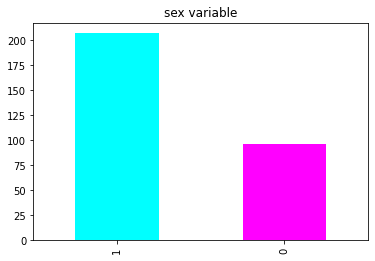

In [10]:
data['sex'].value_counts().plot.bar(color=['cyan','magenta'],title='sex variable')

Around 68 % people are with sex=1
Around 30 % people are with sex=0

#### effect of age on heart attack

<AxesSubplot:title={'center':'effect of age on heart attack'}, xlabel='age', ylabel='target'>

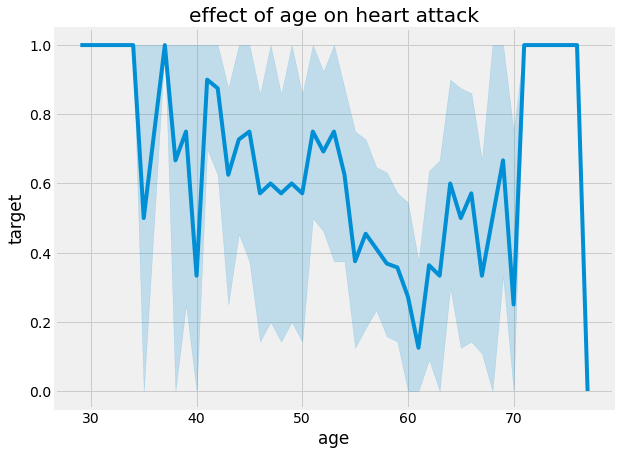

In [11]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("effect of age on heart attack")
sns.lineplot(x=data['age'],y=data['target'])

The people with the age 30 to 35 have higher chance of heart attacks

The people with the age than 70 and less than 75 have higher chance of heart attacks

apart from it no certain trend i will be able to find

#### heart attack related with sex

<AxesSubplot:xlabel='sex', ylabel='count'>

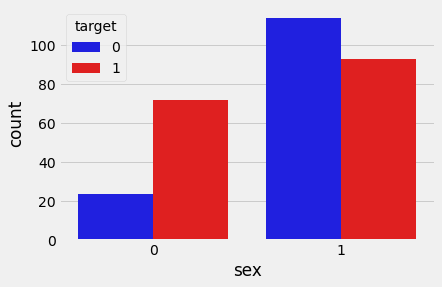

In [12]:
sns.countplot(data=data,x='sex',palette=["blue","red"], hue='target')

people of sex=1 have higher chances of getting heart attacks

#### heart attack related with chest pain

<AxesSubplot:xlabel='chest_pain', ylabel='Density'>

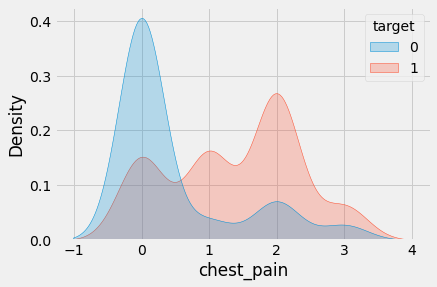

In [13]:
sns.kdeplot(data=data, x='chest_pain',hue="target", fill=True)

people with chest pain type=2 (Non-Anginal) have higher chance of getting heart attacks

#### heart attack related with age

<AxesSubplot:xlabel='age', ylabel='Density'>

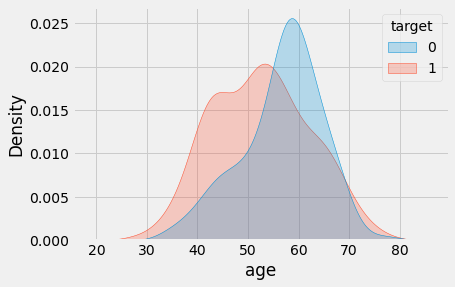

In [14]:
sns.kdeplot(data=data, x='age',hue="target", fill=True)


according to the data people with lower age have more chances of getting heart attacks than those of higher ages

#### heat attack realted with thalium stress test

<AxesSubplot:xlabel='thalium_test', ylabel='Density'>

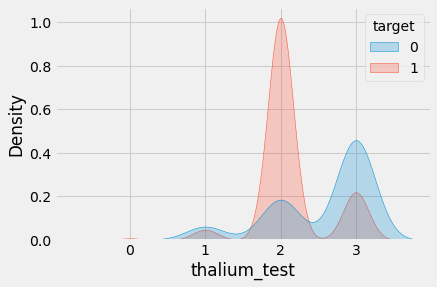

In [15]:
sns.kdeplot(data=data, x='thalium_test',hue="target", fill=True)

people with thall test=2 (fixed defect) have higher chance of getting heart attacks

#### heat attack realted with Exercise induced angina

<AxesSubplot:xlabel='exercise_angina', ylabel='Density'>

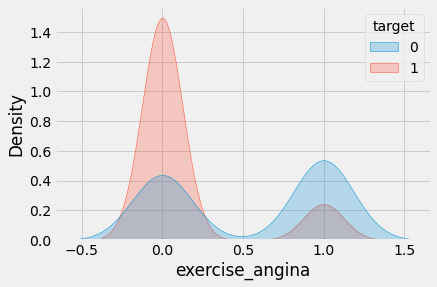

In [16]:
sns.kdeplot(data=data, x='exercise_angina',hue="target", fill=True)

people with exng=0 (No) have higher chances of getting heart attacks

#### effect of age on blood pressure

<AxesSubplot:title={'center':'effect of age on blood pressure'}, xlabel='age', ylabel='blood_pressure'>

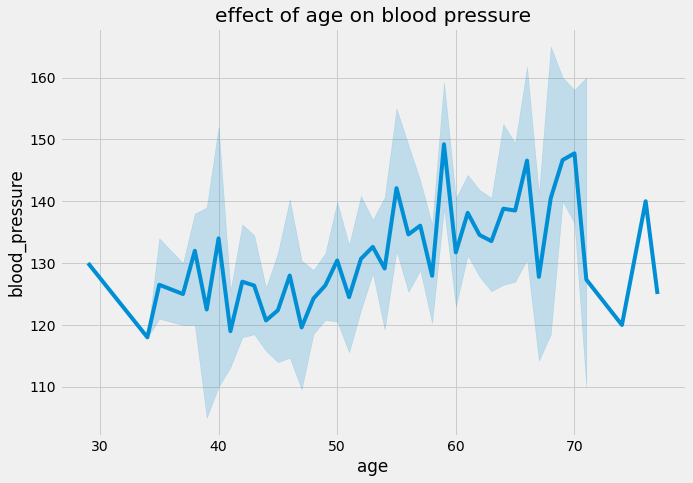

In [17]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("effect of age on blood pressure")
sns.lineplot(x=data['age'],y=data['blood_pressure'])

as age is incresing the increase in the blood pressure has been founded



#### effect of age on cholestrol level

<AxesSubplot:title={'center':'effect of age on cholestrol level'}, xlabel='age', ylabel='chol'>

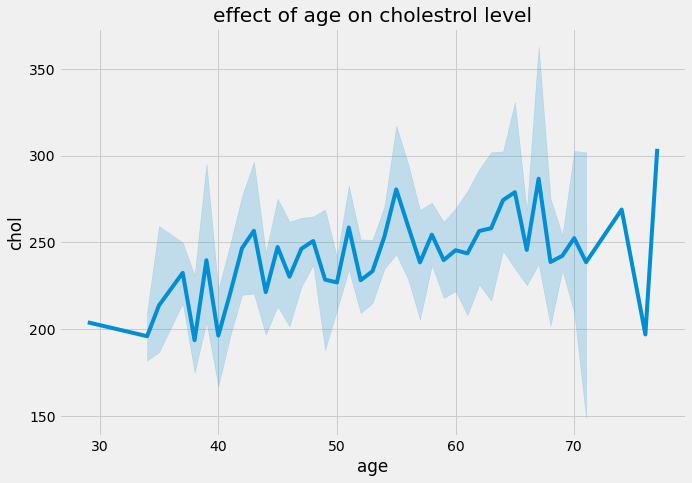

In [18]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("effect of age on cholestrol level")
sns.lineplot(x=data['age'],y=data['chol'])

as age is incresing the increase in the cholestrol level has been founded

#### effect of age on heart rate

<AxesSubplot:title={'center':'effect of age on heart rate'}, xlabel='age', ylabel='max_heart_rate'>

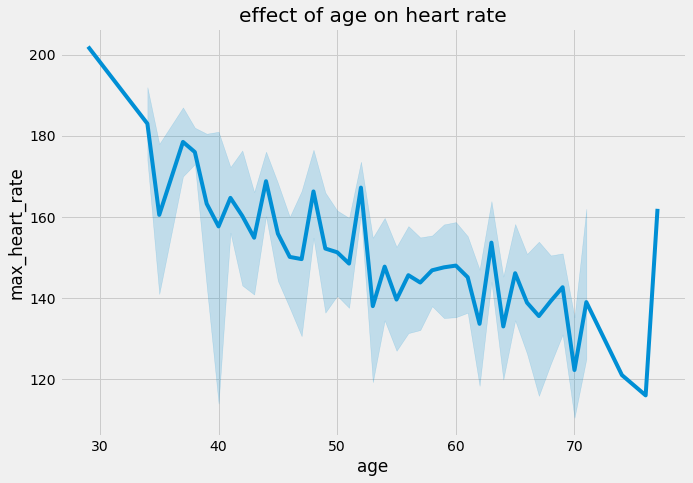

In [19]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("effect of age on heart rate")
sns.lineplot(x=data['age'],y=data['max_heart_rate'])

as age is incresing the decrease in the heart rate has been founded

#### How does incresed heart rate and age affect the heart attack

<AxesSubplot:title={'center':'effect of heart attack with increase in age and heart rate'}, xlabel='age', ylabel='max_heart_rate'>

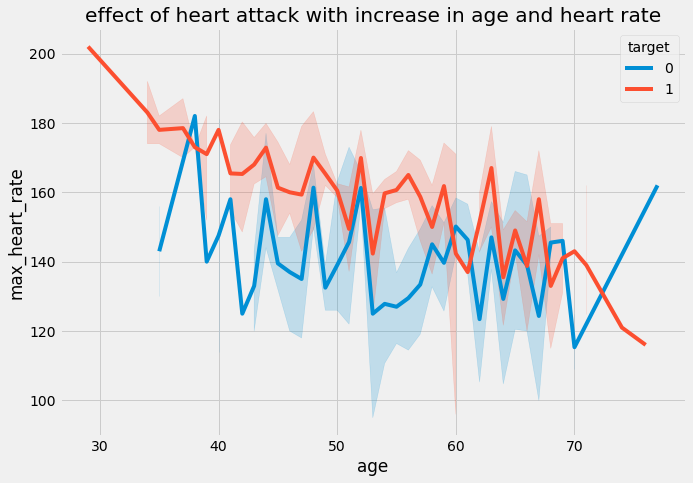

In [20]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("effect of heart attack with increase in age and heart rate")
sns.lineplot(x=data['age'],y=data['max_heart_rate'],hue=data['target'])

as with the increase in the age the heart rate is decresing and also the people with more chances of heart attacks are decreasing hence we can say higher heart rate increases the chance of heart attack

#### How does incresed blood pressure and age affect the heart attack

<AxesSubplot:title={'center':'effect of heart attack with increase in age and blood pressure'}, xlabel='age', ylabel='blood_pressure'>

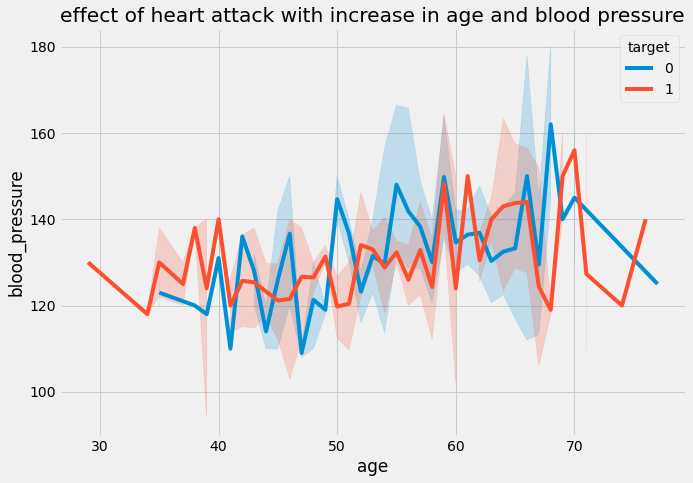

In [21]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("effect of heart attack with increase in age and blood pressure")
sns.lineplot(x=data['age'],y=data['blood_pressure'],hue=data['target'])

as with the increase in the age the blood pressure is incresing and also the people with more chances of heart attacks are also increasing hence we can say blood pressure increases the chance of heart attack

# Model Preparation

In [22]:
y = data["target"]
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state = 0)

Before applying algorithm we should check whether the data is equally splitted or not, because if data is not splitted equally it will cause for data imbalacing problem

In [23]:
from collections import Counter
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({1: 131, 0: 111})

In [24]:
X_train

,age,sex,chest_pain,blood_pressure,chol,fasting_sugar,restecg,max_heart_rate,exercise_angina,oldpeak,slope,major_vessels,thalium_test
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2


In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [27]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[21  6]
 [ 3 31]]


Accuracy of Logistic Regression: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [28]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[24  3]
 [ 4 30]]


Accuracy of K-NeighborsClassifier: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



In [29]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[23  4]
 [ 7 27]]


Accuracy of DecisionTreeClassifier: 81.9672131147541 

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [30]:
#m7 = 'Support Vector Classifier'
#svc =  SVC(kernel='rbf', C=2)
#svc.fit(X_train, y_train)
#svc_predicted = svc.predict(X_test)
#svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
#svc_acc_score = accuracy_score(y_test, svc_predicted)
#print("confussion matrix")
#print(svc_conf_matrix)
#print("\n")
#print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
#print(classification_report(y_test,svc_predicted))

confussion matrix
[[23  4]
 [ 3 31]]


Accuracy of Support Vector Classifier: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [31]:
import pickle

In [32]:
pickle.dump(lr,open("hear_attack",'wb'))

In [33]:
pwd

'C:\\Users\\maddi\\Heart Attack Prediction'